## Limpeza e Tratamento de Dados

### Atividade com intuito de realizar a prática de conceitos básicos de limpeza e tratamento de dados

**Condições que precisam ser atendidas:**

* Aparência: sol, chuva, nublado
* Temperatura: -130 ~ 130°F
* Umidade: 0 ~ 100%
* Jogar: sim/não

In [1]:
#Importando bibliotecas necessárias

import pandas as pd
import statistics as sts
import seaborn as srs

In [2]:
# Importando base de dados e visualizado os primeiros itens

dataset = pd.read_csv("../data/tempo.csv", sep=";")

dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
# Explorando dados categoricos
# Aparencia

group = dataset.groupby(['Aparencia']).size()
group

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

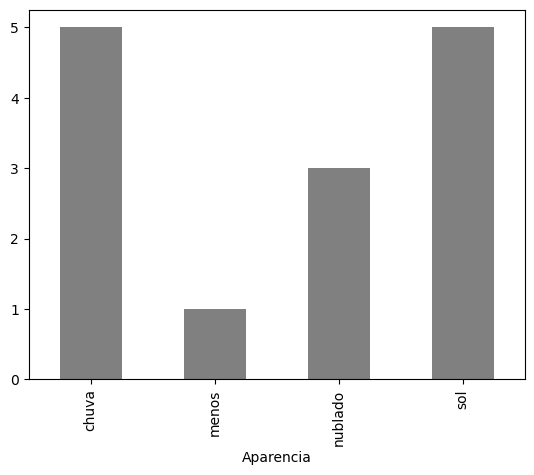

In [4]:
group.plot.bar(color = 'gray')

In [5]:
# Vento

group = dataset.groupby(['Vento']).size()
group

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

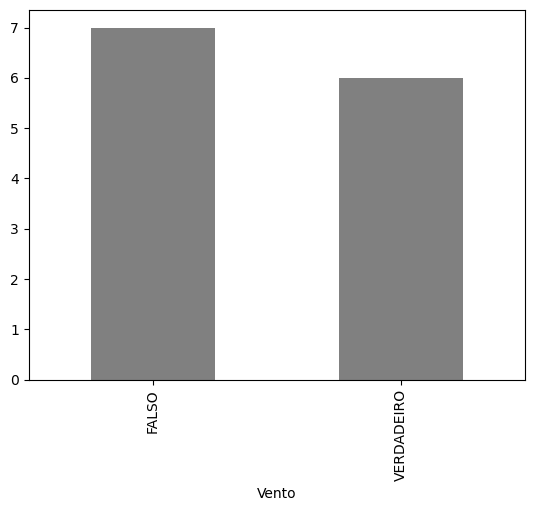

In [6]:
group.plot.bar(color='gray')

In [7]:
# Jogar

group = dataset.groupby(['Jogar']).size()
group

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

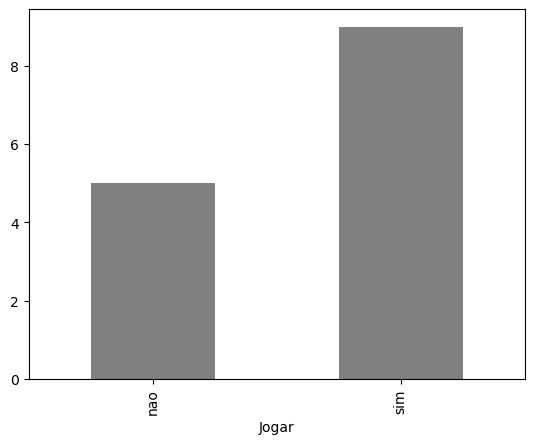

In [8]:
group.plot.bar(color ='gray')